<a href="https://colab.research.google.com/github/Shri-patole-55/EDA-Airbnb/blob/main/EDA_Airbnb_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Name of Team Members -** 
1.   Shrikant Narayan Patole.
2.   Nilay Hemant Dhage.







## **1. Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **2. Load Dataset**

In [2]:
 #load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Airbnb NYC 2019.csv')

In [5]:
#lets see first 5 rows of dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Dataset Rows and Column count
df.shape

(48895, 16)

In [7]:
#Get the non-null count and datatypes of values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Get Descriptive stats of data 
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Variable Description:**

1. id: Unique ID
2. name: name of the listing
3. host_id: Unique host ID
4. host_name: name of the host
5. neighbourhood_group: location
6. neighbourhood: area
7. latitude: latitude range
8. longitude: longitude range
9. room_type: type of listing
10. price: price of listing
11. minimum_nights: minimum nights to be paid for
12. number_of_reviews: number of reviews
13. last_review: content of the last review
14. reviews_per_month: number of reviews per month
15. calculated_host_listings_count: total count
16. availability_365: number of days when listing is available for booking

Checking unique values of categorical columns

In [10]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
len(df['neighbourhood'].unique())

221

In [13]:
len(df['host_id'].unique())

37457

In [14]:
len(df['id'].unique())

48895

## **Data Wrangling**

#### **3.Replacing Null values**
We can see that min value in price column is 0.So to replace the zero values using Interpolate method,we first need to sort the data with neighbourhood group,nieghbourhood,room type and price column respectively.We can assume that these three column highly determine the price.

In [15]:
# Make a copy of original dataset
df1=df.copy()

In [17]:
#firstly,remove the duplicates
df1.drop_duplicates(inplace=True)

In [18]:
# Replace 0 in Price column with np.NaN
# Lets see how many null values we have now
df1['price'].replace(0,np.nan,inplace=True)
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
# Checking the NaN values replaced on zero by comparing to original dataset
df1.loc[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,NaN,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,NaN,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,NaN,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,NaN,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,NaN,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,NaN,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,NaN,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,NaN,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,NaN,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,NaN,30,2,2019-06-22,0.11,6,333


In [20]:
# Sorting the dataset to use interpolate method
df1=df.sort_values(by=['neighbourhood_group','neighbourhood','room_type','price'],ascending=True)
df1['price']=df1['price'].interpolate(method='nearest')

In [21]:
# Lets see if the null values has been replaced by some values
df1.loc[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


In [22]:
# To crosscheck the Interpolate method,lets calculate average price of room depending on Neighbourhood group and room types
Average_price=df1.groupby(['neighbourhood_group','room_type'])['price'].mean()
Average_price

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

So if we compare the above 11 values replaced,they are pretty close but yet they can vary depending on the neighbourhood. We have replaced the null values in price column successfully.

In [23]:
# We can replace the null values in reviews_per_month column with 0

df1['reviews_per_month'] = df1['reviews_per_month'].replace(np.nan, 0)

We can see in the 'last_review' column that there are some reviews from before 2017 year.The data we have is from late 2019.So we can say that those last reviewed before 2017 are no longer in business with Airbnb.So we have to remove such listings.

In [24]:
#we can see that there are reviews from before 2017.
df1['last_review'].value_counts()

2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2014-09-30       1
2014-11-04       1
2012-09-23       1
2014-05-17       1
2017-03-30       1
Name: last_review, Length: 1764, dtype: int64

In [25]:
# Convert the last_review column to datetime value.
def str2date(x):
    try:
        return datetime.strptime(x,'%Y-%m-%d')
    except:
        return pd.NaT

df1['last_review']=df1['last_review'].apply(str2date)


In [26]:
# We will strip the date into month and year column and then we will drop all data before july 2017. 

def convert_to_year(datevalue):
  return datevalue.year
def convert_to_month(datevalue):
  return datevalue.month

df1['last_review_year'] = df1['last_review'].apply(convert_to_year)
df1['last_review_month']=df1['last_review'].apply(convert_to_month)

index_def=df1[df1['last_review_year']<2017].index
df1=df1.drop(index_def)
index_def2=df1[(df1['last_review_year']==2017) & (df1['last_review_month']<7) ].index
df1=df1.drop(index_def2)

In [27]:
# Lets drop the year and month column to get as original data.
df1.drop(columns=['last_review_year','last_review_month'],inplace=True)

In [28]:
# Lets see the total null values present now
df1.isnull().sum()

id                                    0
name                                 11
host_id                               0
host_name                            15
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can say that 'name' & 'host_name' columns are compensated more uniquely by 'id' & 'host_id',so we dont have to worry of the missing values in those columns.For now the purpose of filtering out date is done so we can continue with null values present in 'last_review' column.

## **Data Visualizations**

In [ ]:
# Create some font dictionary for title and x,y axis labelling purpose.
font1 = {'family':'serif','size':18}
font2 = {'family':'serif','color':'darkred','size':14}

## **Analyzes done ahead:**
* **Univariate analysis**
1. highest no of airbnb owned by a host
2. Number of hotel listing depending on location
3. Most popular neighbourhood preferred by customers
* **Bivariate Analysis** 
4. Host with highest reviews
5. Room types preferred by customers in each neighbourhood group
6. Trend of number of reviews with respect to price of the listings

* **Multivariate Analysis**
7. Average price of neighbourhood group depending on room type
8. Availability of rooms in neighbourhood groups depending on their type
9. Minimum nights spent depending on the neighbourhood and room type
10. Latitude and longitude relation with neighbourhood group
11. Co-relation heatmap






### **Q1) highest no of airbnb owned by a host**

In [ ]:
highest_hotel_owner=df1['host_id'].value_counts().head(10)
highest_hotel_owner

219517861    327
107434423    232
30283594     108
137358866    103
12243051      96
61391963      91
22541573      83
16098958      79
200380610     65
120762452     50
Name: host_id, dtype: int64

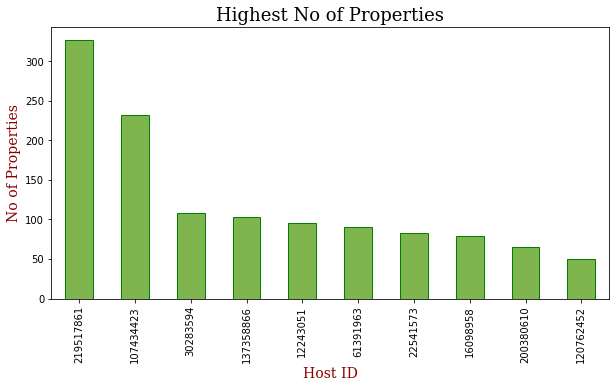

In [ ]:
plt.figure(figsize=(10,5))
highest_hotel_owner.plot(kind='bar',color='#7eb54e',edgecolor='green')
plt.xlabel('Host ID',fontdict=font2)
plt.ylabel('No of Properties',fontdict=font2)
plt.title('Highest No of Properties',fontdict=font1)
plt.show()

### Reason for selecting bar chart:
The bar chart is used because we can easily compare between the values
### Insights found from the chart
We found that the Host with unique ID '219517861','107434423' and '30283594' respectively own highest no of properties.
### Gained useful insight
Top 3 hosts have almost more than 100 properties hosted.So company can provide some extra facilities,rewards to them which will help in maintaining good relations.  

### **Q2) Number of hotel listing depending on location**

In [ ]:
Locations = df['neighbourhood_group'].value_counts()
Locations

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

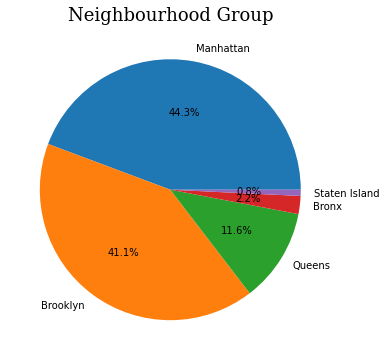

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group",fontdict=font1)
plt.pie(Locations, labels=Locations.index, autopct='%1.1f%%')
plt.show()

### Reason for selecting Pie chart
Pie chart can efficiently display the percentage of categorical data in simple understandable manner
### Insights found from the chart
* We can see that almost majority of customers (85.4%) prefer Brooklyn and Manhattan as a staying location.
* Remaining customers preferred Queens also,but less customers are staying in Bronx,Staten Island.

### Gained useful insights
* As more customers may prefer to stay in Brooklyn and Manhattan,we can increase the no of properties in these areas.
* Staten Island and Bronx are least preferred locations,so we can assume that properties in these areas may have negative impact on revenue and potential competition can be high. 
* Company should try to attract more customer to Staten Island and Bronx.

### **Q3) Most popular neighbourhood preferred by customers** 

In [ ]:

popular_neighbourhood =df1.neighbourhood.value_counts().sort_values(ascending=False)[:10]
popular_neighbourhood

Bedford-Stuyvesant    3380
Williamsburg          3350
Harlem                2379
Bushwick              2202
Hell's Kitchen        1807
Upper West Side       1620
Upper East Side       1552
East Village          1535
Midtown               1388
Crown Heights         1345
Name: neighbourhood, dtype: int64

<BarContainer object of 10 artists>

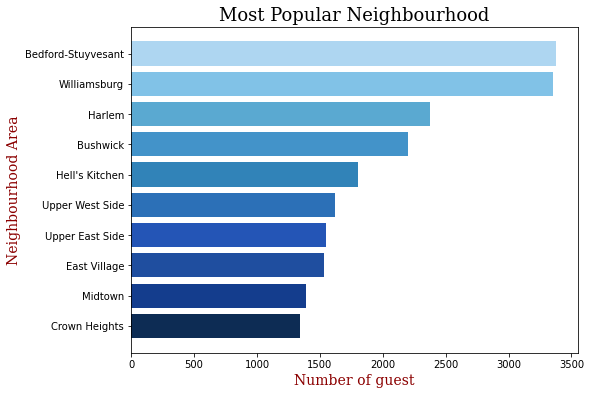

In [ ]:
x = list(popular_neighbourhood.index)
y = list(popular_neighbourhood.values)
x.reverse()
y.reverse()
colors = ['#0d2c54', '#143d8d', '#1f4e9f', '#2455b6', '#2c70b7', '#3183b8', '#4393c9', '#5aa9d1', '#81c2e7', '#aed6f1']
plt.figure(figsize=(8, 6))
plt.title("Most Popular Neighbourhood",fontdict=font1)
plt.ylabel("Neighbourhood Area",fontdict=font2)
plt.xlabel("Number of guest",fontdict=font2)
plt.barh(x,y,color=colors)

### Reason for selecting Horizontal Bar Plot
We can easily compare the categorical to numerical values using horizontal bar plot.
### Insights found from Bar plot
* Top 4 neighbourhood hosted more than 2000 guests and remaining 6 also have 
  hosted more than 1000 of guests. 
* Bedford-Stuyvesant and Williamsburg are the busiest neighbourhoods with more than 3000 visits in total.

### Useful Insights
Company should provide more facilities to customers in these neighbourhoods as it may have high impact on no of customers.







### **Q4) Host with highest reviews**

In [ ]:
preferred_host=df1.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False).head(10).reset_index()
preferred_host['host_id'] = preferred_host['host_id'].apply(str)
preferred_host


,host_id,number_of_reviews
0,37312959,2273
1,344035,2205
2,26432133,2017
3,35524316,1971
4,40176101,1818
5,4734398,1798
6,16677326,1355
7,6885157,1346
8,219517861,1281
9,23591164,1269


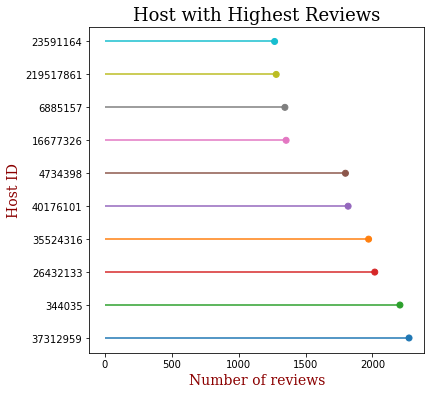

In [ ]:
plt.figure(figsize=(6,6))
colour=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.hlines(y='host_id', xmin=0, xmax='number_of_reviews', color=colour,data=preferred_host)
plt.title('Host with Highest Reviews',fontdict=font1)
plt.ylabel('Host ID',fontdict=font2)
plt.xlabel('Number of reviews',fontdict=font2)
plt.scatter('number_of_reviews','host_id',data=preferred_host,c=colour)


### Reason to use horizontal line plot
For comparison between a categarical and numerical data, horizontal line plot combined with scatter points provide easy and understandable visualization.
### Insights from the plot
We can see that top 3 hosts have more than 2000 reviews and remaining 7 have more than 1000 reviews.
### Useful insights
Company can take feedback from these high reviewed hosts and can implement them for other hosts to improvr their service. 

### **Q5) Room types preferred by customers in each neighbourhood group**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


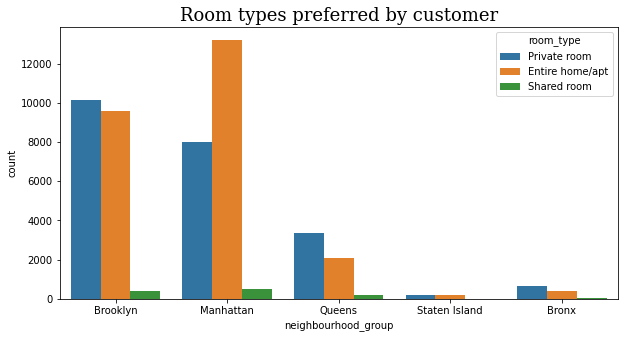

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Room types preferred by customer",fontdict=font1)
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="tab10")


### Reason for choosing countplot 
Countplot in bar kind provides efficient comparison between two categorical and one numerical (count) value.Bar plots are easy to understand and explain.
### Insights found from countplot
* In Brooklyn and Staten Island,peoples preference for booking private rooms or entire home/apartments are almost same.
* However we can see that in Manhattan,people prefer more to book entire home/apartments.
* In Queens and Bronx ,people book private rooms more than other room types.
* Irrespective of location,less no of people prefer to stay in shared rooms.

### Useful Insights
* If company wants to expand their business in Manhattan,they should focus more on creating more no of homes/apartments.
* Company can see why less no of people prefer to stay in shared rooms.If it has negative impact on revenue then they should opt out or decrease the no of shared rooms.

### **Q6) Trend of number of reviews with respect to price of the listings**

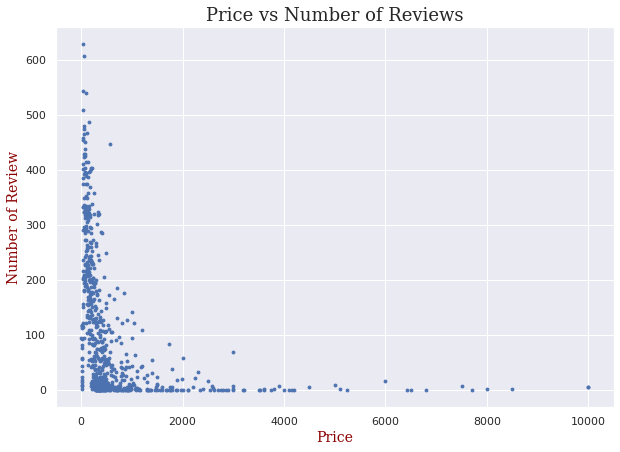

In [ ]:
price_review_relate = df.groupby(['price'])['number_of_reviews'].max().reset_index()
fig = plt.figure(figsize = (10, 7))
plt.scatter('price','number_of_reviews',data=price_review_relate,s=8)
plt.xlabel("Price",fontdict=font2)
plt.ylabel("Number of Review",fontdict=font2)
plt.title("Price vs Number of Reviews",fontdict=font1)
plt.show()

### Reason to choose scatterplot
Scatterplot can be used for effective comparison of two high no of numerical data.The density distibution can help in finding trend relation.
### Insights found from data  
We can see that as price increases the no of reviews decreases.
### Useful Insights
Low priced rooms are more likely to be visited and price factor effects on the no of reviews i.e popularity of property.  

### **Q7) average price of neighbourhood group depending on room type**

In [ ]:
avg_price= df1.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
avg_price

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.811828
1,Bronx,Private room,67.158654
2,Bronx,Shared room,60.431034
3,Brooklyn,Entire home/apt,179.821131
4,Brooklyn,Private room,76.149545
5,Brooklyn,Shared room,48.506494
6,Manhattan,Entire home/apt,253.383444
7,Manhattan,Private room,116.780081
8,Manhattan,Shared room,86.807425
9,Queens,Entire home/apt,148.699124


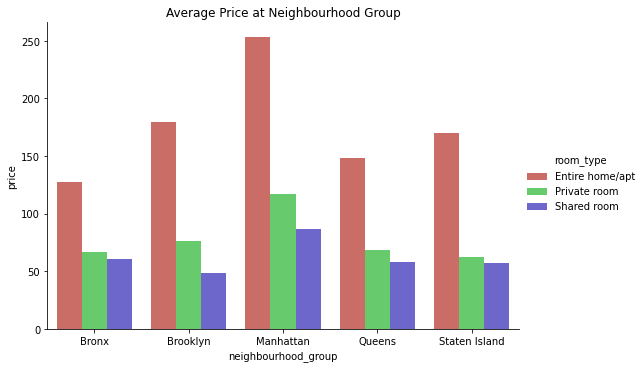

In [ ]:
sns.catplot(x='neighbourhood_group',y='price',hue='room_type',data=avg_price,kind='bar',height=5,aspect=1.5,palette='hls').set(title='Average Price at Neighbourhood Group')

### Reason for using catplot
Categorical plot in bar kind provides efficient comparison between two categorical and one numerical value.Bar plots are easy to understand and explain.
### Insights found
* Average price of entire home/apartments is higher in each neighbourhood group.
* We can see that average price for booking private rooms and shared rooms are almost same.

### Useful insights
* From previous graph,we see that more people prefer to use private rooms than shared rooms.A customer will prefer to stay in private rooms for a little more of price than staying in shared rooms.
* Company should reduce the price of shared rooms.As more customers will stay in one shared room,we can earn good revenue from shared rooms too.
* Even though no of visitors are less in Queens,Bronx and Staten Island,the average prices are comparatively high.So company should reduce the price in these neighbourhood groups to increase the traffic.

### **Q8) Availability of rooms in neighbourhood groups depending on their type**

In [ ]:
availability=df1.groupby(['neighbourhood_group','room_type']).agg(mean_avail=('availability_365', np.mean)) 
availability

mean_avail
neighbourhood_group room_type                  
Bronx               Entire home/apt  159.029570
                    Private room     174.104167
                    Shared room      156.568966
Brooklyn            Entire home/apt  106.801521
                    Private room     109.354328
                    Shared room      185.781818
Manhattan           Entire home/apt  128.573381
                    Private room     111.964018
                    Shared room      150.118329
Queens              Entire home/apt  140.798557
                    Private room     152.955158
                    Shared room      195.084656
Staten Island       Entire home/apt  182.176471
                    Private room     227.059140
                    Shared room       64.777778

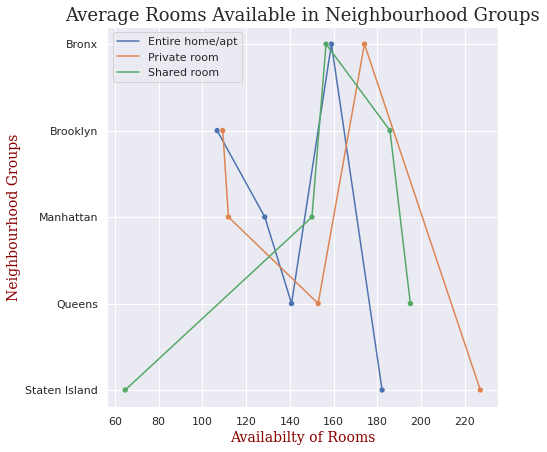

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})

sns.lineplot(x='mean_avail',y='neighbourhood_group',hue='room_type',data=availability)
sns.scatterplot(x='mean_avail',y='neighbourhood_group',hue='room_type',data=availability,legend=False)
plt.title('Average Rooms Available in Neighbourhood Groups',fontdict=font1)
plt.ylabel('Neighbourhood Groups',fontdict=font2)
plt.xlabel('Availabilty of Rooms',fontdict=font2)
plt.legend(loc = 'upper left')


### Reason for using lineplot 
lineplot can be used to compare two categorical and one numerical value effectively.The variations can be compared with scatterplot to point exact variations more effectively.
### Insights found from plot 
* Room availability in more crowded areas such as Brooklyn and Manhattan is less than that of low crowded areas.
*Brooklyn has low availability of entire home/apartments and private rooms even though they are preferred more for stay by customers.
*Manhattan can have more availability of private rooms to increase its traffic.


Text(0.5, 0, 'Neighbourhood Groups')

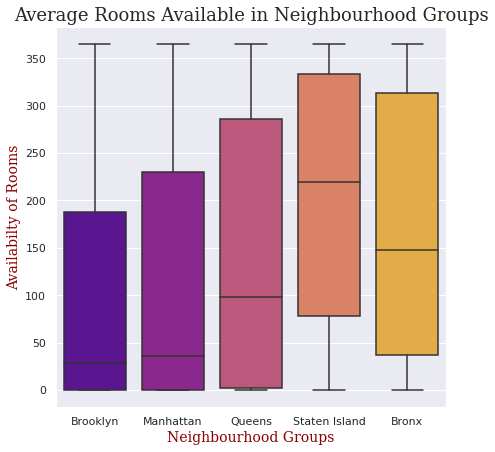

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.title('Average Rooms Available in Neighbourhood Groups',fontdict=font1)
plt.ylabel('Availabilty of Rooms',fontdict=font2)
plt.xlabel('Neighbourhood Groups',fontdict=font2)

### Reason for using Boxplot
We use box plot to show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”.
### Insights from the plot
* From the quartile range of box plot,in Brooklyn and Manhattan,we found that some rooms are available for high no of days while majority of rooms are available less no of days which gives us irregular distribution.
* The distribution of rooms available is pretty much symmetric in Staten Island and Bronx.Both neighbourhood groups also have more available rooms than others.
* Although Queens have more available rooms than Manhattan and Brooklyn,the distribution is less symmetric than Staten Island and Bronx.

### Useful Insights
* Even though properties in Bronx,Queens and Staten Island are more available,people still prefer to visit Manhattan and Brooklyn.It may be because of less no of properties and their comparatively higher prices in Staten Island and Bronx.
* Properties in Manhattan and Brooklyn are more crowded and preferred.So company should try to increase availability of rooms in these areas.
* As availability of rooms is positive point for Staten Island,Bronx and Queens.Steps can be taken to increase the no of visits in these areas. 

### **Q9) Minimum nights spent depending on the neighbourhood and room type**

In [ ]:
min_nights=df1.groupby(['neighbourhood_group','room_type','minimum_nights'])['price'].mean().reset_index()
min_nights=min_nights.loc[min_nights['minimum_nights'] < 365]
min_nights

,neighbourhood_group,room_type,minimum_nights,price
0,Bronx,Entire home/apt,1,143.426829
1,Bronx,Entire home/apt,2,137.946309
2,Bronx,Entire home/apt,3,115.196721
3,Bronx,Entire home/apt,4,101.571429
4,Bronx,Entire home/apt,5,105.571429
...,...,...,...,...
425,Staten Island,Private room,33,40.000000
426,Staten Island,Shared room,1,21.000000
427,Staten Island,Shared room,2,82.500000
428,Staten Island,Shared room,3,95.000000


Text(0.5, 0, 'Minimum Nights')

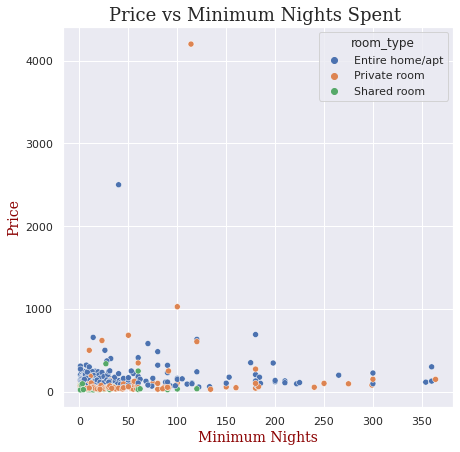

In [ ]:
sns.scatterplot(x='minimum_nights',y='price',data=min_nights,hue='room_type');
plt.title('Price vs Minimum Nights Spent ',fontdict=font1)
plt.ylabel('Price',fontdict=font2)
plt.xlabel('Minimum Nights',fontdict=font2)

### Reason to choose scatterplot
Scatterplot can be used to effectively show the relation between two numerical and one categorical variable.
### Insight found from scatterplot
* Average prices of properties are not much varying with the changes in minimum numbers of night spent in it.
* People are spending more nights in private rooms and entire home/apartments

### Useful Insights
Company has provided the service to customer that on an average they can be charged less or equally for any amount of nights spent.

###  **Q10)Latitude and longitude relation with neighbourhood group** 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Locations')

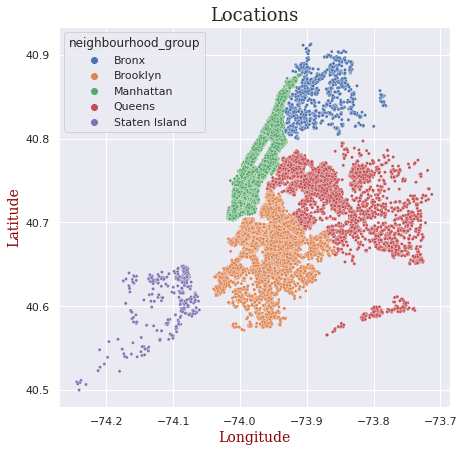

In [ ]:
sns.scatterplot(df1.longitude, df1.latitude,s=10,hue=df1.neighbourhood_group)

plt.xlabel('Longitude',fontdict=font2)
plt.ylabel('Latitude',fontdict=font2)
plt.title('Locations',fontdict=font1)

### Reason to use scatterplot
Scatterplot are useful in multivariate analysis and highly used to plot latitudes and longitudes distribution
### Insights from the scatterplot
We can see that properties are more concentrated on perticular places like in middle of the plot and they seem to decrease as we towrds left or right from the middle.
### Useful insights
It is possible that Manhattan and Brooklyn area of scatterplot where the properties are densely located are somewhere near seashore or tourist attraction places.

### **Q11) Correlation heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

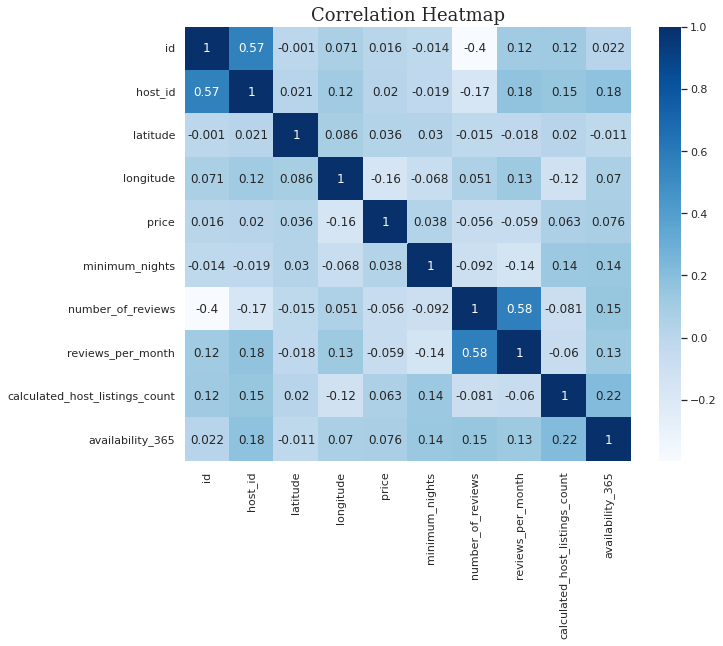

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),cmap='Blues', annot=True)
plt.title("Correlation Heatmap",fontdict=font1)

### Reason to use Heatmap
We use the heat maps to visualize website user behavior. By looking at an aggregate of all user interactions on a web page, it becomes easier to spot issues and opportunities for improvement.
### Insights from the heatmap
Number of reviews and reviews per month have strong positive correlation and it is very obvious Availability_365 and minimum nights have a small positive correlation(0.2) 
### useful Insights
from the heatmap we can say that numerical values are independent in terms of correlation.All the numerical values are highly dependent on categorical values.

##  **Solution to Business Objective**

### from above data visualizations we can suggest
* Top 3 hosts have almost more than 100 properties hosted.So company can provide some extra facilities,rewards to them which will help in maintaining good relations.
* As more customers may prefer to stay in Brooklyn and Manhattan,company can increase the no of properties in these areas.
* Company should try to attract more customer to Staten Island and Bronx.
* Company should provide more facilities to customers in top 10 busiest neighbourhoods as it may have high impact on no of customers.
* Company can take feedback from the highly reviewed hosts and can implement them for other hosts to improve their service.
* Even though properties in Bronx,Queens and Staten Island are more available,people still prefer to visit Manhattan and Brooklyn.It may be because of less no of properties and their comparatively higher prices in Staten Island and Bronx.
* Company should try to reduce the prices of shared rooms across all neighbourhoods.They seem to be overvalued in comparison to private rooms.
* As availability of rooms is positive point for Staten Island,Bronx and Queens.Steps can be taken to increase the no of visits in these areas.
* Properties in Manhattan and Brooklyn are more crowded and preferred.So company should try to increase availability of rooms in these areas.
* Low priced rooms are more likely to be visited and price factor effects on the no of reviews i.e popularity of property.
* price,no of reviews,availability,minimum nights spent are independent in terms of correlation with each other.All these factors are highly dependent on values such as neighbourhood,neighbourhood groups,room type.